In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [118]:
df_comments = pd.read_csv('./comments/comments_with_sentiment')
df_submission = pd.read_csv('./submissions/submissions_with_sentiment')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,5,7,8,10,11,12,13,14,16,17,18,19,20,21,22,23,30,31,32,33,34,35,37,42,45,46,47,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,10,11,12,16,17,20,21,24,25,26,34,37,39,43,44,45,46,48,49,57,58,59,64,66,70,72,76,82,83,84,89,90,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
len(df_comments)

10417427

In [120]:
df_comments['parent_id'] = 't3_' + df_comments['permalink'].str.split('/').str.get(4)

In [121]:
df_comments = df_comments[~(df_comments['parent_id'].isna())]

In [122]:
len(df_comments)

6620564

In [123]:
df_comments = df_comments[df_comments.comment_sentiment != 0]

In [124]:
df_comments = df_comments[df_comments['parent_id'].str.startswith('t3')]

In [125]:
df_submission = df_submission[df_submission.num_comments >= 15]

In [126]:
df_submission = df_submission[df_submission.title_sentiment != 0]

In [127]:
len(df_submission)

44845

In [128]:
len(df_comments)

4594224

In [129]:
df_comments = df_comments[df_comments.parent_id.str[3:].isin(df_submission.id)]

In [130]:
grpby = df_comments.groupby('parent_id')

In [131]:
counts = grpby.count().reset_index()

In [132]:
gt_30 = counts[counts['body'] > 15]['parent_id']

In [133]:
df_comments = df_comments[df_comments.parent_id.isin(gt_30)]

In [134]:
len(df_comments)

3275161

In [135]:
 df_submission = df_submission[df_submission.id.isin(df_comments.parent_id.str[3:])]

In [136]:
len(df_submission)

10981

In [137]:
df_comments.to_csv("comments_gte_15_tl.csv")

In [138]:
df_submission.to_csv("submissions_gte_15_tl.csv")

In [139]:
avg_comments = df_comments[['parent_id', 'comment_sentiment']].groupby('parent_id').mean().reset_index()

In [140]:
avg_comments.columns

Index(['parent_id', 'comment_sentiment'], dtype='object')

In [141]:
avg_comments['id'] = avg_comments['parent_id']

In [142]:
avg_comments = avg_comments.drop('parent_id', axis=1)

In [143]:
avg_comments.id = avg_comments.id.str[3:]

In [144]:
merged = df_submission[['id', 'title_sentiment', 'title']].merge(avg_comments, on='id')

In [145]:
merged.columns

Index(['id', 'title_sentiment', 'title', 'comment_sentiment'], dtype='object')

In [146]:
pd.set_option('max_colwidth', 600)

In [147]:
merged.sort_values('comment_sentiment',ascending=False)

,id,title_sentiment,title,comment_sentiment
10759,794no0,0.5267,Jeff Bezos just passed Bill Gates for world's richest person,0.552870
3208,84aeeg,-0.5574,Scientist Stephen Hawking has died aged 76,0.515800
9032,7e8350,0.5994,FAA approves Flying Cow drones to restore Puerto Rico cell network,0.495141
1985,8csucl,0.2023,"As tornado sweeps through neighborhood, teen just keeps playing Fortnite video game",0.493200
6644,7t9xad,0.5994,It's a lunar trifecta. A rare 'super blue blood moon' will soon light up the sky,0.473320
821,8kyb97,0.8176,Golden Knights were 500-1 long shots to win Stanley Cup. Now they are four wins away,0.462810
2692,81m85f,-0.5994,McDonald's Is Dow Jones' Biggest Loser On 'Tough Start' For $1-$2-$3 Dollar Menu,0.459981
5328,80h2wi,0.1531,Girl injured by emotional support dog while boarding Southwest flight,0.459333
2774,8249ww,0.6369,Best Buy is shutting down 250 mobile outlets,0.450825
10498,77zeou,0.2732,"New research shows relationships that begin online are stronger than bonds made offline. Online dating increases interracial relationships, as dating sites and apps introduce people to a much more extensive and diverse set of networks beyond personal connections made in real life",0.445155


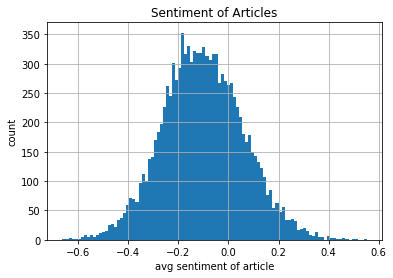

In [148]:
merged['comment_sentiment'].hist(bins=100);
plt.xlabel('avg sentiment of article');
plt.ylabel('count');
plt.title("Sentiment of Articles");
plt.savefig("sentiment_histogram")

In [ ]:
merged['comment_sentiment'].hist(bins=100);
plt.xlabel('avg sentiment of article');
plt.ylabel('count');
plt.title("Sentiment of Articles");
plt.savefig("sentiment_histogram")

In [149]:
from scipy.stats.stats import pearsonr

In [150]:
pearsonr(merged.title_sentiment, merged.comment_sentiment)[0]

0.386279633756404

In [151]:
merged.to_csv("title_with_comment_sentiment.csv")

In [3]:
merged = pd.read_csv("title_with_comment_sentiment.csv")

In [80]:
from sklearn.decomposition import NMF, PCA, TruncatedSVD

from sklearn.model_selection import KFold

from  sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
tfidf_model = TfidfVectorizer(stop_words='english')
kf = KFold(n_splits=10)
nmf = NMF(verbose=0, max_iter=200,n_components=100,tol=0.00000000000000001)
diffs = []
rsq = []
model = RandomForestRegressor(n_estimators=500)
#model = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.0)
#model = LinearRegression()

In [ ]:
for train_index, test_index in kf.split(merged):
    print("beginning")
    train_X, train_y = merged.iloc[train_index]['title'].values, merged.iloc[train_index]['comment_sentiment'].values
    test_X, test_y = merged.iloc[test_index]['title'].values, merged.iloc[test_index]['comment_sentiment'].values
    
    tfidf_model = tfidf_model.fit(train_X)
    train_X = tfidf_model.transform(train_X)
    test_X = tfidf_model.transform(test_X)
    
    nmf_model = nmf.fit(train_X)
    print("Reconstruction_err ", nmf_model.reconstruction_err_)
    train_X = nmf_model.transform(train_X)
    test_X = nmf_model.transform(test_X)
    
    train_X = np.append(train_X, merged.iloc[train_index]['title_sentiment'].values.reshape(train_X.shape[0], 1), 1)
    test_X = np.append(test_X, merged.iloc[test_index]['title_sentiment'].values.reshape(test_X.shape[0], 1), 1)
    
    model = model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    print("post transform")
    diffs.extend((yhat - test_y))
    rscore = model.score(test_X, test_y)
    print('RR ', rscore)
    rsq.append(rscore)

beginning
Reconstruction_err  92.64461892427475
post transform
RR  0.25788291073772496
beginning
Reconstruction_err  92.61728352253745


In [77]:
sum(rsq)/len(rsq)

0.2650650865238977

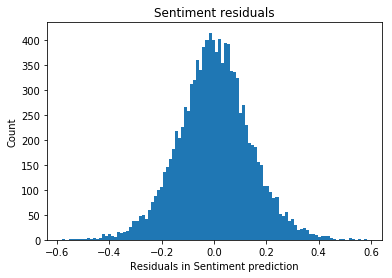

In [78]:
plt.hist(diffs, bins=100);
plt.xlabel("Residuals in Sentiment prediction");
plt.ylabel("Count");
plt.title("Sentiment residuals");
plt.savefig("sentiment_residuals")

In [60]:
rfr.score([[1],[2],[3],[4],[5]], [5,5,5,8,6])

-0.029411764705882693

In [ ]:
for comp in nmf_model.components_:
    words_freq = list(zip(tfidf_model.get_feature_names(), comp))
    sorted_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    pprint.pprint(sorted_words_freq[:40])
    print()

